In [21]:
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import rioxarray as rxr 
import geopandas as gpd 
import earthpy as et 
import earthpy.spatial as es 
import earthpy.plot as ep 

In [22]:
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [23]:
naip_data_path = os.path.join("cold-springs-fire", "naip", "m_3910505_nw_13_1_20150919", "crop", "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

naip_data

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 81MB
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

In [24]:
naip_data.shape

(4, 2312, 4377)

In [25]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

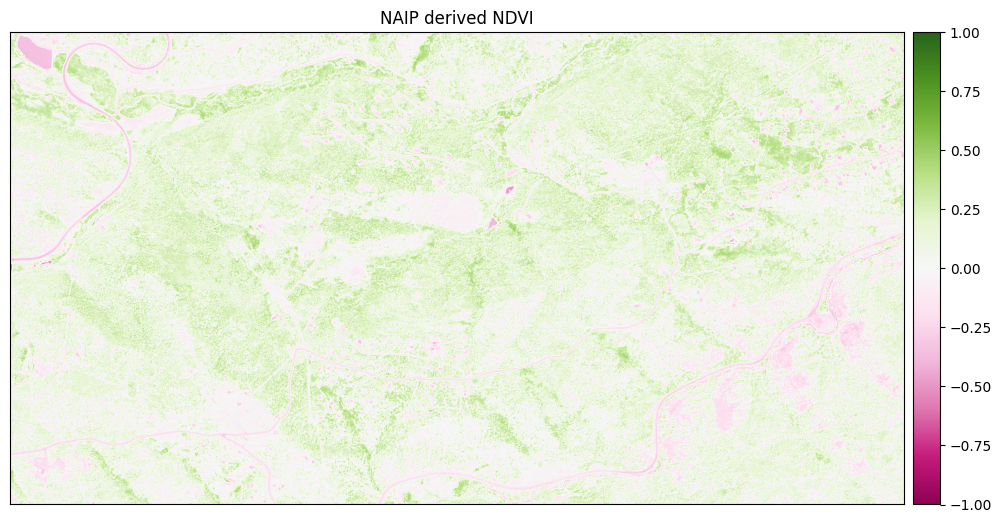

In [26]:
ep.plot_bands(naip_ndvi, cmap="PiYG", scale=False, vmin=-1, vmax=1, title="NAIP derived NDVI")
plt.show()

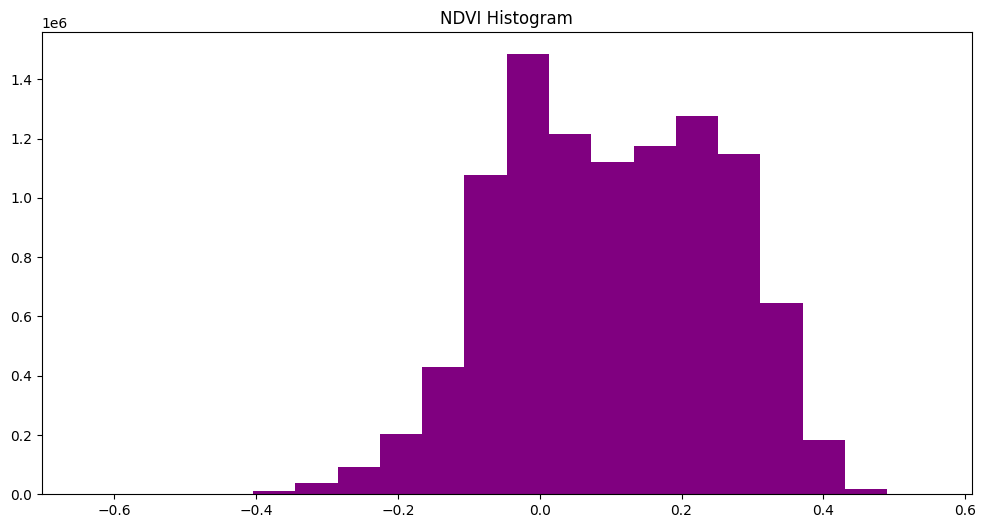

In [27]:
ep.hist(naip_ndvi.values, figsize=(12,6), title=["NDVI Histogram"])
plt.show()

In [28]:
naip_ndvi_outpath = os.path.join("cold-springs-fire", "outputs", "naip_ndvi.tif")

naip_ndvi.rio.to_raster(naip_ndvi_outpath)

In [29]:
ls cold-springs-fire/outputs

naip_ndvi.tif
